In [68]:
import pandas as pd
import numpy as np

data = pd.read_csv('final_dataset_sample.csv')
data = data.sample(frac=1) 

In [70]:
features = data.drop(['class'],axis=1)
target = data['class']

In [72]:
print('Shape of features : ', features.shape)
print('Shape of target : ', target.shape)

Shape of features :  (3322, 44)
Shape of target :  (3322,)


In [74]:
from tensorflow.keras.utils import to_categorical

target_OH = to_categorical(target, 2)

In [75]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(input_shape=(44,), units=500, activation='relu'))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=150, activation='relu'))
model.add(Dense(units=150, activation='relu'))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 500)               22500     
_________________________________________________________________
dense_29 (Dense)             (None, 200)               100200    
_________________________________________________________________
dense_30 (Dense)             (None, 150)               30150     
_________________________________________________________________
dense_31 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_32 (Dense)             (None, 50)                7550      
_________________________________________________________________
dense_33 (Dense)             (None, 2)                 102       
Total params: 183,152
Trainable params: 183,152
Non-trainable params: 0
________________________________________________

In [76]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
features_norm = scaler.fit_transform(features)

In [77]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(features_norm, target_OH, test_size=0.2)

In [81]:
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(xtrain, ytrain, batch_size=120, epochs=10, validation_data=(xtest,ytest),verbose=2)

Epoch 1/10
23/23 - 1s - loss: 0.1543 - accuracy: 0.9390 - val_loss: 0.1354 - val_accuracy: 0.9444
Epoch 2/10
23/23 - 0s - loss: 0.0938 - accuracy: 0.9578 - val_loss: 0.1131 - val_accuracy: 0.9579
Epoch 3/10
23/23 - 0s - loss: 0.0688 - accuracy: 0.9721 - val_loss: 0.1754 - val_accuracy: 0.9489
Epoch 4/10
23/23 - 0s - loss: 0.0774 - accuracy: 0.9673 - val_loss: 0.1110 - val_accuracy: 0.9579
Epoch 5/10
23/23 - 0s - loss: 0.0581 - accuracy: 0.9767 - val_loss: 0.0875 - val_accuracy: 0.9594
Epoch 6/10
23/23 - 0s - loss: 0.0558 - accuracy: 0.9770 - val_loss: 0.0825 - val_accuracy: 0.9639
Epoch 7/10
23/23 - 0s - loss: 0.0600 - accuracy: 0.9740 - val_loss: 0.1380 - val_accuracy: 0.9549
Epoch 8/10
23/23 - 0s - loss: 0.0587 - accuracy: 0.9755 - val_loss: 0.0729 - val_accuracy: 0.9669
Epoch 9/10
23/23 - 0s - loss: 0.0500 - accuracy: 0.9793 - val_loss: 0.0798 - val_accuracy: 0.9624
Epoch 10/10
23/23 - 0s - loss: 0.0454 - accuracy: 0.9816 - val_loss: 0.0921 - val_accuracy: 0.9699


# Predictions

In [85]:
preds = np.argmax(model.predict(xtest),1)
real = np.argmax(ytest, 1)

print('number of misclassifications : ',(preds!=real).sum())

number of misclassifications :  20


<AxesSubplot:>

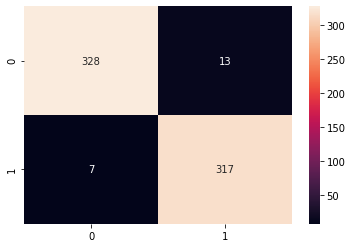

In [83]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap

preds = np.argmax(model.predict(xtest),1)
cm = confusion_matrix(real, preds)
heatmap(cm, annot=True, fmt='d')



In [86]:
## Saving the model

model.save('D:\Project_Ideas\TeachableMachine_Local\handPose\hand\Kpts_model.h5')

# Optimal Normalization Strategy for pose data(keypoints)

In [ ]:
# for i in range(len(dataset.shape[0])):
#     if((i+1)%22==0):
#         r = (i+1)
#         rect_h = ((dataset.iloc[:,1].iloc[0:(i+1)]).max())-((dataset.iloc[:,1].iloc[0:(i+1)]).min())
#         rect_w = (dataset.iloc[:,0].max())-(dataset.iloc[:,0].min())
#         features.iloc[:,0]=features.iloc[:,0]/rect_w
#         features.iloc[:,1]=features.iloc[:,1]/rect_h
        

In [ ]:
# rect_h = (data.iloc[:,1].max())-(data.iloc[:,1].min())
# rect_w = (data.iloc[:,0].max())-(data.iloc[:,0].min())

# # #(xmin-xmin)
# # features.iloc[:,0][features.iloc[:,0].min()] = (features.iloc[:,0].min())-(features.iloc[:,0].min())
# # #(ymin-ymin)
# # features.iloc[:,1][features.iloc[:,1].min()] = (features.iloc[:,1].min())-(features.iloc[:,1].min())

# # features.iloc[:,0][features.iloc[:,0].max()] = features.iloc[:,0].max()-rect_w
# # features.iloc[:,1][features.iloc[:,1].max()] = features.iloc[:,1].max()-rect_h


# features.iloc[:,0]=features.iloc[:,0]/rect_w
# features.iloc[:,1]=features.iloc[:,1]/rect_h

# ML Algos (Optional)


In [ ]:
# from sklearn.model_selection import train_test_split

# xtrain, xtest, ytrain, ytest = train_test_split(features_norm, target, test_size=0.3, random_state=42)

In [ ]:
# from sklearn.svm import SVC
# model = SVC() #Checkout the parameters in the docs
# model.fit(xtrain,ytrain)

# model.score(xtest,ytest)


In [ ]:
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression() #Checkout the parameters in the docs
# model.fit(xtrain,ytrain)

# model.score(xtest,ytest)

In [ ]:
# from sklearn import tree

# model = tree.DecisionTreeClassifier()
# model.fit(xtrain,ytrain)

# model.score(xtest,ytest)

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier()
# model.fit(xtrain,ytrain)

# model.score(xtest,ytest)